In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import sklearn.metrics as metrics

In [12]:
data = pd.read_csv('/Users/nikita/Downloads/dirty_data.csv')

In [13]:
data

,Unnamed: 0,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,0,West,Sandy,Cotton,0.000000,27.676966,False,True,Cloudy,122,6.555816
1,1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,3,North,Sandy,Soybean,0.000000,16.644190,False,True,Rainy,146,6.517573
4,4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [14]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
data = pd.get_dummies(data=data, columns=['Crop', 'Soil_Type', 'Region', 'Weather_Condition'])

In [16]:
data

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,0.000000,27.676966,False,True,122,6.555816,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.000000,16.644190,False,True,146,6.517573,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,False,False,76,1.347586,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
999996,932.991383,39.661039,True,False,93,7.311594,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
999997,867.362046,24.370042,True,False,108,5.763182,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
999998,492.812857,33.045505,False,False,102,2.070159,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True


Preprocessing

In [17]:
for i in data.columns:
    data[i] = data[i].replace(0, data[i].median())


In [18]:
data

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,549.285638,27.676966,False,True,122,6.555816,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,549.285638,16.644190,False,True,146,6.517573,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,False,False,76,1.347586,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
999996,932.991383,39.661039,True,False,93,7.311594,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
999997,867.362046,24.370042,True,False,108,5.763182,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
999998,492.812857,33.045505,False,False,102,2.070159,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True


In [19]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
Rainfall_mm,1.000000,-0.000156,-0.001071,-0.000545,-0.002672,0.763903,-0.000786,-0.000100,-0.001361,0.000946,0.000850,0.000452,0.001915,-0.001153,-0.000607,0.000538,-0.000617,-0.000078,-0.001620,0.001798,0.000090,-0.000269,-0.001483,0.000491,0.000990
Temperature_Celsius,-0.000156,1.000000,0.002405,-0.000502,-0.000737,0.085526,-0.000225,0.001431,-0.001711,-0.000394,0.000271,0.000630,-0.000030,-0.000742,-0.001549,0.001699,0.000562,0.000061,-0.000154,-0.000692,-0.000157,0.001003,0.001238,-0.001059,-0.000178
Fertilizer_Used,-0.001071,0.002405,1.000000,0.001510,-0.001029,0.442099,-0.000609,0.000598,-0.001330,0.000397,-0.000142,0.001087,-0.000759,-0.001697,0.001923,-0.000964,0.000485,0.001009,-0.000257,-0.000635,0.000568,0.000323,0.000558,-0.002229,0.001671
Irrigation_Used,-0.000545,-0.000502,0.001510,1.000000,-0.001234,0.353741,0.000013,0.000018,0.000418,-0.002774,0.001150,0.001177,0.000249,-0.000619,0.000882,0.000957,-0.000742,-0.000725,-0.000085,0.000230,-0.000765,0.000620,0.000012,0.000939,-0.000950
Days_to_Harvest,-0.002672,-0.000737,-0.001029,-0.001234,1.000000,-0.002591,-0.001196,0.000668,0.000757,0.000101,-0.000673,0.000342,-0.000405,-0.000789,-0.000186,0.001896,-0.000812,0.000297,0.000901,0.000168,-0.000019,-0.001050,0.000022,0.000643,-0.000665
Yield_tons_per_hectare,0.763903,0.085526,0.442099,0.353741,-0.002591,1.000000,-0.000543,0.000361,-0.002132,0.000340,0.001116,0.000861,0.000902,-0.001206,0.000418,0.000419,-0.000254,-0.000279,-0.001319,0.001580,-0.000214,-0.000048,-0.000940,-0.000082,0.001021
Crop_Barley,-0.000786,-0.000225,-0.000609,0.000013,-0.001196,-0.000543,1.000000,-0.200021,-0.200193,-0.200170,-0.199851,-0.200084,-0.000525,-0.000127,0.000564,0.000899,-0.000867,0.000057,-0.000323,0.000328,0.000005,-0.000010,-0.000451,0.001244,-0.000794
Crop_Cotton,-0.000100,0.001431,0.000598,0.000018,0.000668,0.000361,-0.200021,1.000000,-0.200054,-0.200031,-0.199713,-0.199946,0.000246,0.000160,0.000133,-0.000059,0.000831,-0.001311,0.001549,-0.000812,-0.000944,0.000207,-0.001523,0.000300,0.001221
Crop_Maize,-0.001361,-0.001711,-0.001330,0.000418,0.000757,-0.002132,-0.200193,-0.200054,1.000000,-0.200204,-0.199884,-0.200118,0.000448,-0.000868,0.000594,0.000569,-0.000658,-0.000086,-0.000779,0.000589,0.000062,0.000128,-0.000973,0.000097,0.000875
Crop_Rice,0.000946,-0.000394,0.000397,-0.002774,0.000101,0.000340,-0.200170,-0.200031,-0.200204,1.000000,-0.199861,-0.200095,-0.000514,0.001540,-0.000576,-0.001050,-0.000511,0.001112,-0.000823,0.001227,-0.000000,-0.000405,-0.000861,0.000118,0.000742


Text(0, 0.5, 'Tonns')

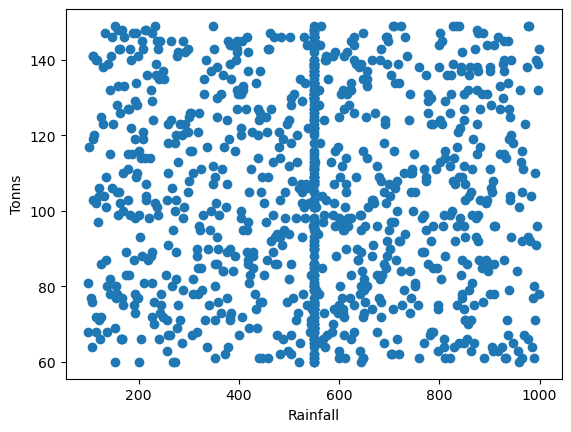

In [20]:
plt.scatter(x=data['Rainfall_mm'].loc[:1000], y=data['Days_to_Harvest'].loc[:1000])
plt.xlabel('Rainfall')
plt.ylabel('Tonns')

Boxplot

In [21]:
data.dtypes

Rainfall_mm                 float64
Temperature_Celsius         float64
Fertilizer_Used                bool
Irrigation_Used                bool
Days_to_Harvest               int64
Yield_tons_per_hectare      float64
Crop_Barley                    bool
Crop_Cotton                    bool
Crop_Maize                     bool
Crop_Rice                      bool
Crop_Soybean                   bool
Crop_Wheat                     bool
Soil_Type_Chalky               bool
Soil_Type_Clay                 bool
Soil_Type_Loam                 bool
Soil_Type_Peaty                bool
Soil_Type_Sandy                bool
Soil_Type_Silt                 bool
Region_East                    bool
Region_North                   bool
Region_South                   bool
Region_West                    bool
Weather_Condition_Cloudy       bool
Weather_Condition_Rainy        bool
Weather_Condition_Sunny        bool
dtype: object

In [22]:
f_types = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

In [23]:
for column in f_types:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 

    filter = (data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 *IQR)
    
    data = data.loc[filter]  




{'whiskers': [<matplotlib.lines.Line2D at 0x1691d5550>,
 'caps': [<matplotlib.lines.Line2D at 0x1691c0050>,
 'boxes': [<matplotlib.lines.Line2D at 0x168cdeb10>,
 'medians': [<matplotlib.lines.Line2D at 0x1691d79d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x169192f10>,
 'means': []}

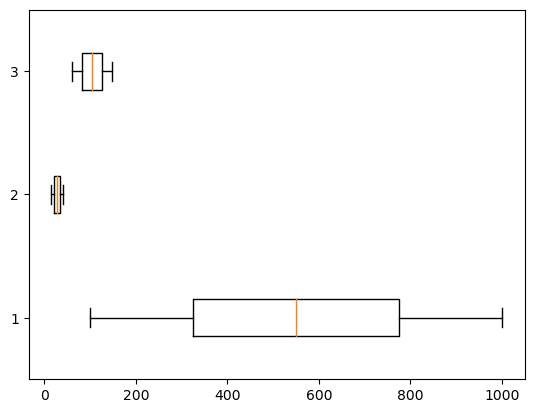

In [24]:
plt.boxplot(x=data[f_types], vert=False)


Text(0.5, 0, 'Rain_mms')

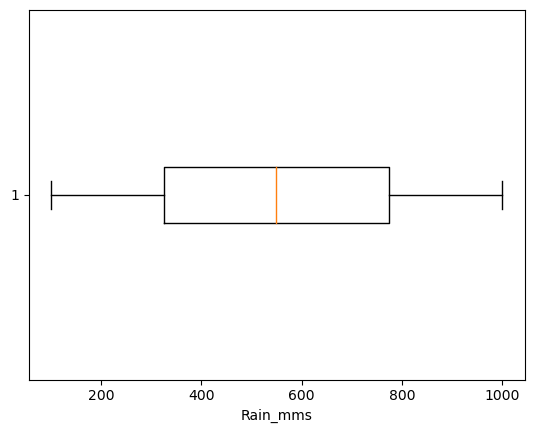

In [25]:
plt.boxplot(x=data['Rainfall_mm'], vert=False)
plt.xlabel('Rain_mms')

<Axes: >

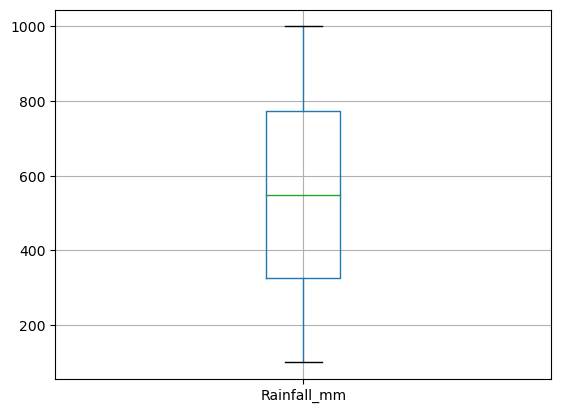

In [26]:
data.boxplot('Rainfall_mm')

array([[<Axes: title={'center': 'Rainfall_mm'}>,
        <Axes: title={'center': 'Temperature_Celsius'}>],
       [<Axes: title={'center': 'Days_to_Harvest'}>,
        <Axes: title={'center': 'Yield_tons_per_hectare'}>]], dtype=object)

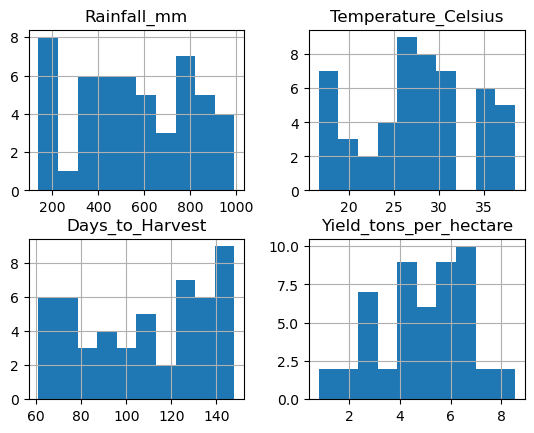

In [27]:
data.loc[:50].hist()

In [28]:
data.dtypes

Rainfall_mm                 float64
Temperature_Celsius         float64
Fertilizer_Used                bool
Irrigation_Used                bool
Days_to_Harvest               int64
Yield_tons_per_hectare      float64
Crop_Barley                    bool
Crop_Cotton                    bool
Crop_Maize                     bool
Crop_Rice                      bool
Crop_Soybean                   bool
Crop_Wheat                     bool
Soil_Type_Chalky               bool
Soil_Type_Clay                 bool
Soil_Type_Loam                 bool
Soil_Type_Peaty                bool
Soil_Type_Sandy                bool
Soil_Type_Silt                 bool
Region_East                    bool
Region_North                   bool
Region_South                   bool
Region_West                    bool
Weather_Condition_Cloudy       bool
Weather_Condition_Rainy        bool
Weather_Condition_Sunny        bool
dtype: object

In [29]:
data

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,549.285638,27.676966,False,True,122,6.555816,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,549.285638,16.644190,False,True,146,6.517573,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,302.805345,27.987428,False,False,76,1.347586,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
999996,932.991383,39.661039,True,False,93,7.311594,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
999997,867.362046,24.370042,True,False,108,5.763182,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
999998,492.812857,33.045505,False,False,102,2.070159,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True


Обучение

In [30]:
data_pre, data_test = data.loc[:900000], data.loc[900000:]

In [31]:
X, y = data_pre.drop('Yield_tons_per_hectare', axis=1), data_pre['Yield_tons_per_hectare'] #y = X*w + e

In [32]:
X

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Region_East,Region_North,Region_South,Region_West,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
0,549.285638,27.676966,False,True,122,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
1,992.673282,18.026142,True,True,140,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,549.285638,16.644190,False,True,146,False,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
4,730.379174,31.620687,True,True,110,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899996,955.040695,28.991123,True,False,111,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
899997,942.642402,16.212182,True,True,83,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
899998,371.653222,36.457623,True,True,119,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
899999,423.380484,17.132135,True,False,112,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [33]:
y

0         6.555816
1         8.527341
2         1.127443
3         6.517573
4         7.248251
            ...   
899996    6.859031
899997    7.509602
899998    4.796820
899999    4.639291
900000    5.440725
Name: Yield_tons_per_hectare, Length: 900001, dtype: float64

In [34]:
X_test, y_test = data_test.drop('Yield_tons_per_hectare', axis=1), data_test['Yield_tons_per_hectare']

In [35]:
scaler = StandardScaler() #x_new = (x - x_mean) / disp
X_train_scaled = scaler.fit_transform(X, y)
X_test_scaled = scaler.fit_transform(X_test, y_test)

In [36]:
X_train_scaled


array([[-0.00213714,  0.02400589, -0.99962785, ...,  1.41637062,
        -0.70797081, -0.7073201 ],
       [ 1.70609754, -1.31392674,  1.00037229, ..., -0.7060299 ,
         1.41248762, -0.7073201 ],
       [-1.5481735 ,  0.31750467, -0.99962785, ..., -0.7060299 ,
        -0.70797081,  1.41378705],
       ...,
       [-0.68649959,  1.24130372,  1.00037229, ...,  1.41637062,
        -0.70797081, -0.7073201 ],
       [-0.48721054, -1.43786662,  1.00037229, ..., -0.7060299 ,
         1.41248762, -0.7073201 ],
       [ 0.77425152,  1.27882281, -0.99962785, ..., -0.7060299 ,
        -0.70797081,  1.41378705]])

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y, test_size=0.3, random_state=17)

# Linear Regression

In [38]:
lin_reg = LinearRegression(n_jobs=-1)

In [39]:
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [40]:
predict = lin_reg.predict(X_val)

In [126]:
linear_mse = mean_squared_error(y_val, predict) 

In [127]:
linear_mse

0.25489103679440744

In [128]:
linear_r_2 = r2_score(y_val, predict)

In [129]:
linear_r_2

0.9113843154867756

# Ridge

In [81]:
ridge = Ridge()

In [82]:
params = {'alpha': range(1, 10)}

In [84]:
best_ridge = GridSearchCV(ridge, param_grid=params)

In [85]:
best_ridge.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': range(1, 10)})

In [86]:
best_ridge.best_estimator_

Ridge(alpha=3)

In [90]:
ridge_predict = best_ridge.predict(X_val)

In [92]:
ridge_mse = mean_squared_error(y_val, ridge_predict)

In [93]:
ridge_mse

0.25488988851229083

In [94]:
ridge_r2 = r2_score(y_val, ridge_predict)

In [95]:
ridge_r2

0.9113847146997375

# Lasso

In [96]:
lasso = Lasso()

In [115]:
lasso_params = {'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, .1]}

In [116]:
best_lasso = GridSearchCV(lasso, param_grid=lasso_params)

In [117]:
best_lasso.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 0.1]})

In [118]:
best_lasso.best_estimator_

Lasso(alpha=0.01)

### Параметр alpha может быть еще меньше ввиду малой кучности данных и слабой корреляции, однако остановимся на 0.01

In [119]:
lasso_predict = best_lasso.predict(X_val)

In [120]:
lasso_mse = mean_squared_error(lasso_predict, y_val)

In [121]:
lasso_mse

0.2551865058221677

In [124]:
lasso_r2 = r2_score(lasso_predict, y_val)

In [125]:
lasso_r2

0.9008240790151567

# Сравнение MSE

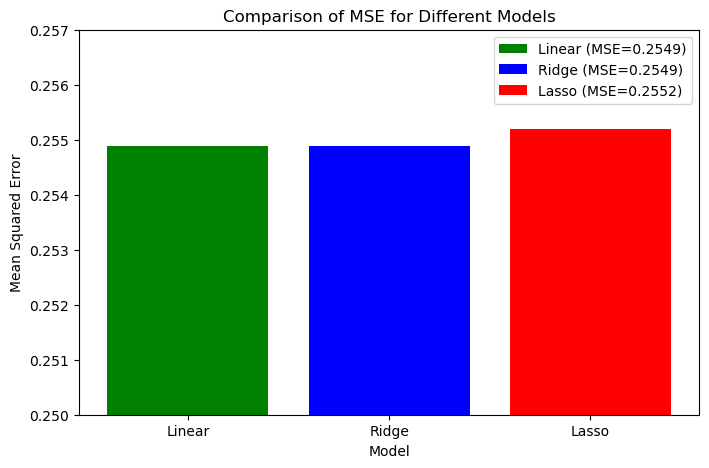

In [149]:



models = ['Linear', 'Ridge', 'Lasso']
mse_values = [linear_mse, ridge_mse, lasso_mse]

# Построение графика
plt.figure(figsize=(8, 5))
bars = plt.bar(models, mse_values, color=['green', 'blue', 'red'])
legend_labels = [f"{model} (MSE={value:.4f})" for model, value in zip(models, mse_values)]
plt.legend(bars, legend_labels)

plt.ylim(0.25, 0.257)

plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE for Different Models')
plt.show()
